In [1]:
import rioxarray
import rasterio
import numpy as np
import qinfer
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import geopandas as gpd
from shapely.geometry.point import Point
import shapely.affinity
import subprocess
from osgeo import gdal
import pygeos
import json
import os
import pandas as pd
from tqdm import tqdm
import requests
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import esda
import libpysal
from scipy import stats

/Users/jparkgeo/opt/anaconda3/envs/agingdam/lib/python3.9/site-packages/qinfer/parallel.py:51: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(


In [2]:
mi = gpd.read_file('./output/TAS_F_mi.geojson')
mi.T

,0,1,2,3
ID,NM00002,CA10019,MS01494,CA10244
LAT,35.463921,34.260981,33.821629,37.110662
LON,-106.208413,-118.386759,-89.772394,-119.88458
NAME,GALISTEO DAM,HANSEN DAM,GRENADA DAM,HIDDEN DAM
LIBRARY_ID,4766,1503,5646,5887
LIBRARY_TYPE,dam_study,dam_study,dam_study,dam_study
MI_POV150,0.07093,0.053416,0.117416,0.032658
pval_POV150,0.0,0.0,0.0,0.000003
MI_UNEMP,0.007042,-0.003325,0.186064,-0.037855
pval_UNEMP,0.186361,0.267474,0.0,0.0


In [3]:
lm = gpd.read_file('./output/TAS_F_lm.geojson')
lm.head(1)

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,...,LISA_DISABL,LISA_SNGPNT,LISA_LIMENG,LISA_MINRTY,LISA_MUNIT,LISA_MOBILE,LISA_CROWD,LISA_NOVEH,LISA_GROUPQ,geometry
0,13.740458,2.9,32.213609,1.4,6.9,32.0,15.82965,8.7,2.670112,0.0,...,LL,LL,LL,LL,LH,LL,LL,Not_Sig,LL,"POLYGON ((-106.49210 35.12702, -106.49201 35.1..."


In [10]:
lm.columns.to_list()

['EP_POV150',
 'EP_UNEMP',
 'EP_HBURD',
 'EP_NOHSDP',
 'EP_UNINSUR',
 'EP_AGE65',
 'EP_AGE17',
 'EP_DISABL',
 'EP_SNGPNT',
 'EP_LIMENG',
 'EP_MINRTY',
 'EP_MUNIT',
 'EP_MOBILE',
 'EP_CROWD',
 'EP_NOVEH',
 'EP_GROUPQ',
 'Dam_ID',
 'GEOID',
 'Class',
 'LISA_POV150',
 'LISA_UNEMP',
 'LISA_HBURD',
 'LISA_NOHSDP',
 'LISA_UNINSUR',
 'LISA_AGE65',
 'LISA_AGE17',
 'LISA_DISABL',
 'LISA_SNGPNT',
 'LISA_LIMENG',
 'LISA_MINRTY',
 'LISA_MUNIT',
 'LISA_MOBILE',
 'LISA_CROWD',
 'LISA_NOVEH',
 'LISA_GROUPQ',
 'geometry']

<AxesSubplot: >

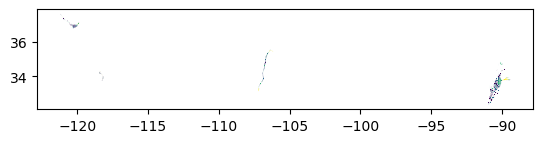

In [4]:
fim = gpd.read_file('./output/TAS_F_fim.geojson')
fim.plot('value')

In [5]:
ellipse = gpd.read_file('./output/TAS_F_ellipse.geojson')
ellipse

,Dam_ID,geometry
0,NM00002,"POLYGON ((-106.11390 36.02160, -106.09516 36.0..."
1,CA10019,"POLYGON ((-118.43083 34.27233, -118.41846 34.2..."
2,MS01494,"POLYGON ((-89.53453 34.96636, -89.47662 34.929..."
3,CA10244,"POLYGON ((-121.24422 37.57065, -121.22621 37.5..."


NM00002


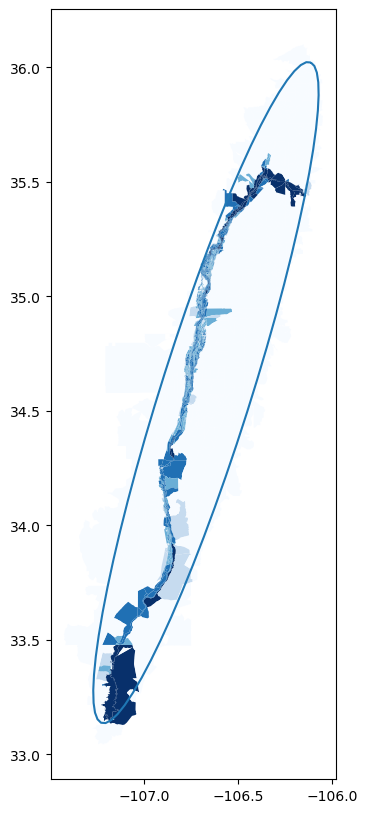

CA10019


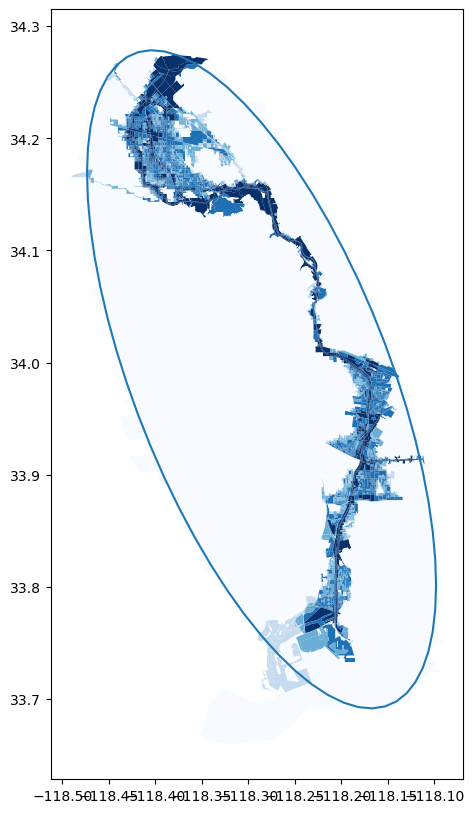

MS01494


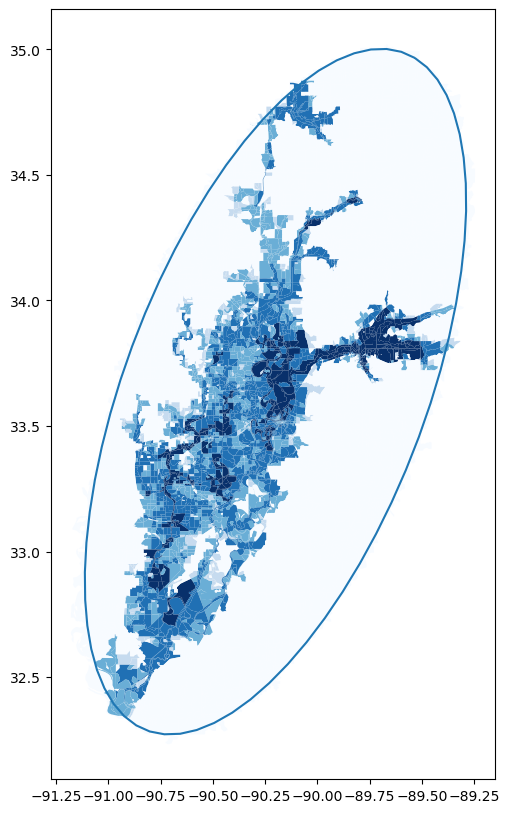

CA10244


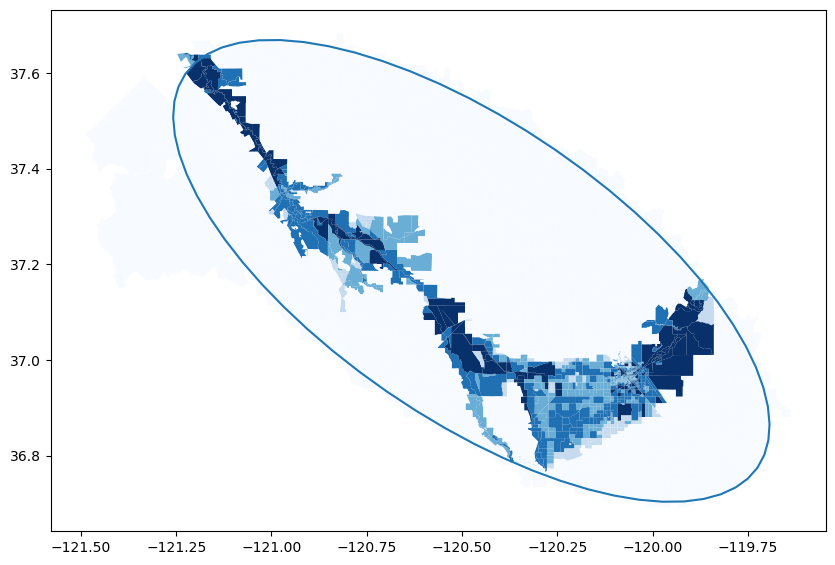

In [6]:
for dam_id in ellipse['Dam_ID']:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    print(dam_id)
    lm.loc[lm['Dam_ID'] == dam_id].plot('Class', ax=ax, cmap='Blues')
    ellipse.loc[ellipse['Dam_ID'] == dam_id].boundary.plot(ax=ax)
    plt.show()


In [7]:
# str: single variable
# list: [[To be summed and set as numerator], demonimator]  
census_info = {
                "EP_POV150" : [['S1701_C01_040E'], 'S1701_C01_001E'],
                "EP_UNEMP"  : 'DP03_0009PE',
                "EP_HBURD"  : [['S2503_C01_028E', 'S2503_C01_032E', 'S2503_C01_036E', 'S2503_C01_040E'], 
                            'S2503_C01_001E'],
                "EP_NOHSDP" : 'S0601_C01_033E',
                "EP_UNINSUR" : 'S2701_C05_001E',
                "EP_AGE65" : 'S0101_C02_030E',
                "EP_AGE17" : [['B09001_001E'], 
                            'S0601_C01_001E'],
                "EP_DISABL" : 'DP02_0072PE',
                "EP_SNGPNT" : [['B11012_010E', 'B11012_015E'], 'DP02_0001E'],
                "EP_LIMENG" : [['B16005_007E', 'B16005_008E', 'B16005_012E', 'B16005_013E', 'B16005_017E', 'B16005_018E', 
                                'B16005_022E', 'B16005_023E', 'B16005_029E', 'B16005_030E', 'B16005_034E', 'B16005_035E',
                                'B16005_039E', 'B16005_040E', 'B16005_044E', 'B16005_045E'], 
                            'B16005_001E'],
                "EP_MINRTY" : [['DP05_0071E', 'DP05_0078E', 'DP05_0079E', 'DP05_0080E', 
                                'DP05_0081E', 'DP05_0082E', 'DP05_0083E'],
                            'S0601_C01_001E'],
                "EP_MUNIT" : [['DP04_0012E', 'DP04_0013E'], 
                            'DP04_0001E'],
                "EP_MOBILE" : 'DP04_0014PE',
                "EP_CROWD" : [['DP04_0078E', 'DP04_0079E'], 
                            'DP04_0002E'],
                "EP_NOVEH" : 'DP04_0058PE',
                "EP_GROUPQ": [['B26001_001E'], 
                            'S0601_C01_001E'],
}
plot_cols = [ 'LISA_' + col.split('_')[1] for col in census_info.keys()]
plot_cols
# census_dic = census_info

['LISA_POV150',
 'LISA_UNEMP',
 'LISA_HBURD',
 'LISA_NOHSDP',
 'LISA_UNINSUR',
 'LISA_AGE65',
 'LISA_AGE17',
 'LISA_DISABL',
 'LISA_SNGPNT',
 'LISA_LIMENG',
 'LISA_MINRTY',
 'LISA_MUNIT',
 'LISA_MOBILE',
 'LISA_CROWD',
 'LISA_NOVEH',
 'LISA_GROUPQ']

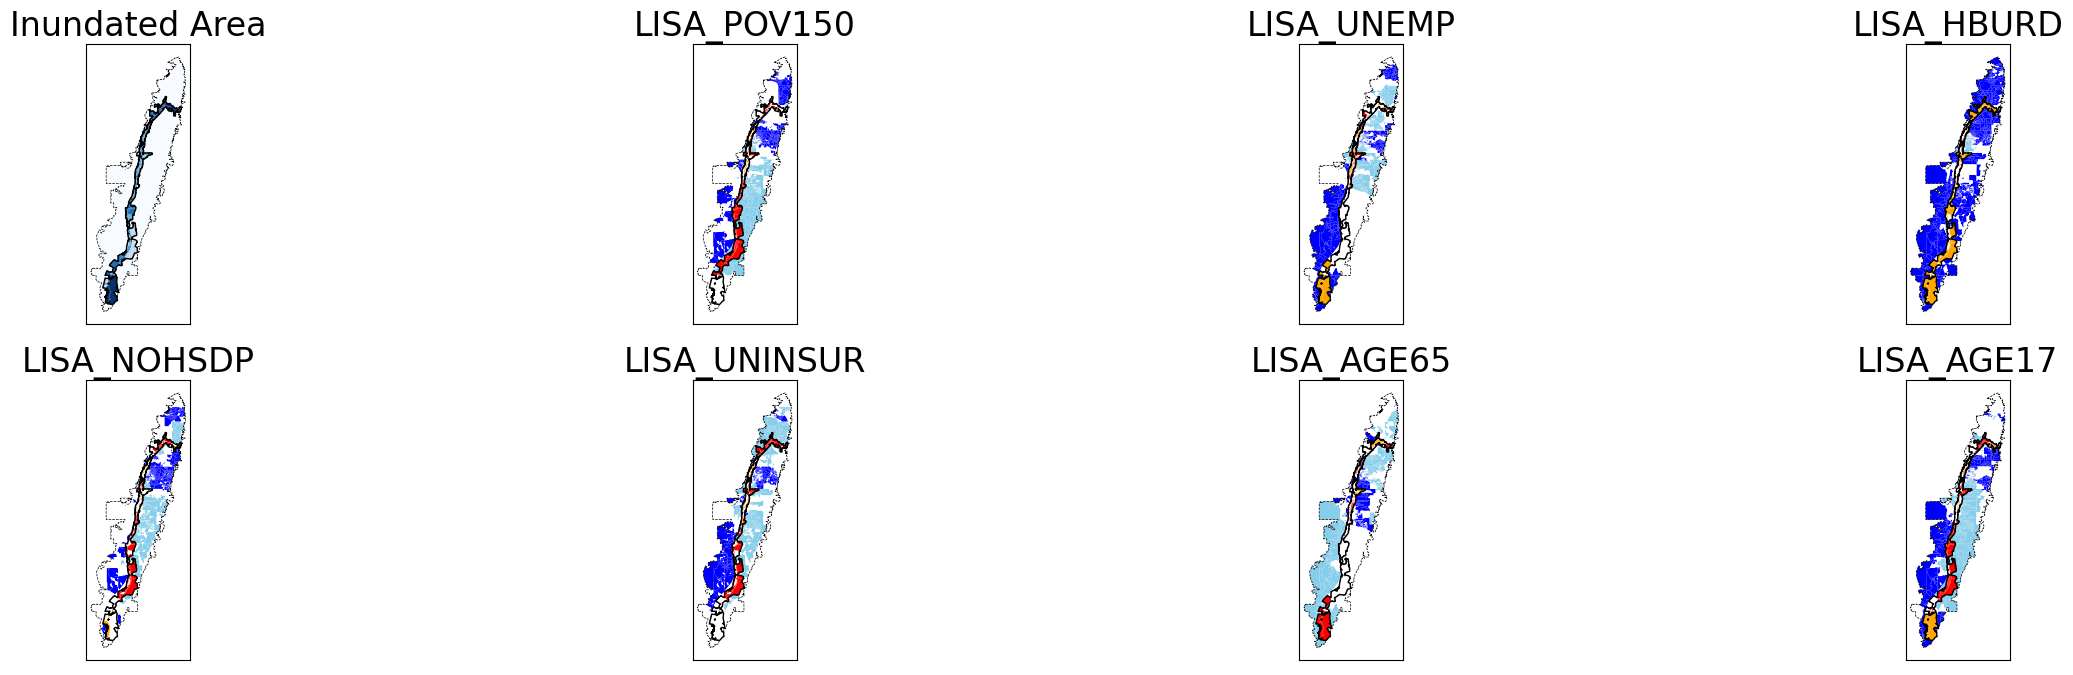

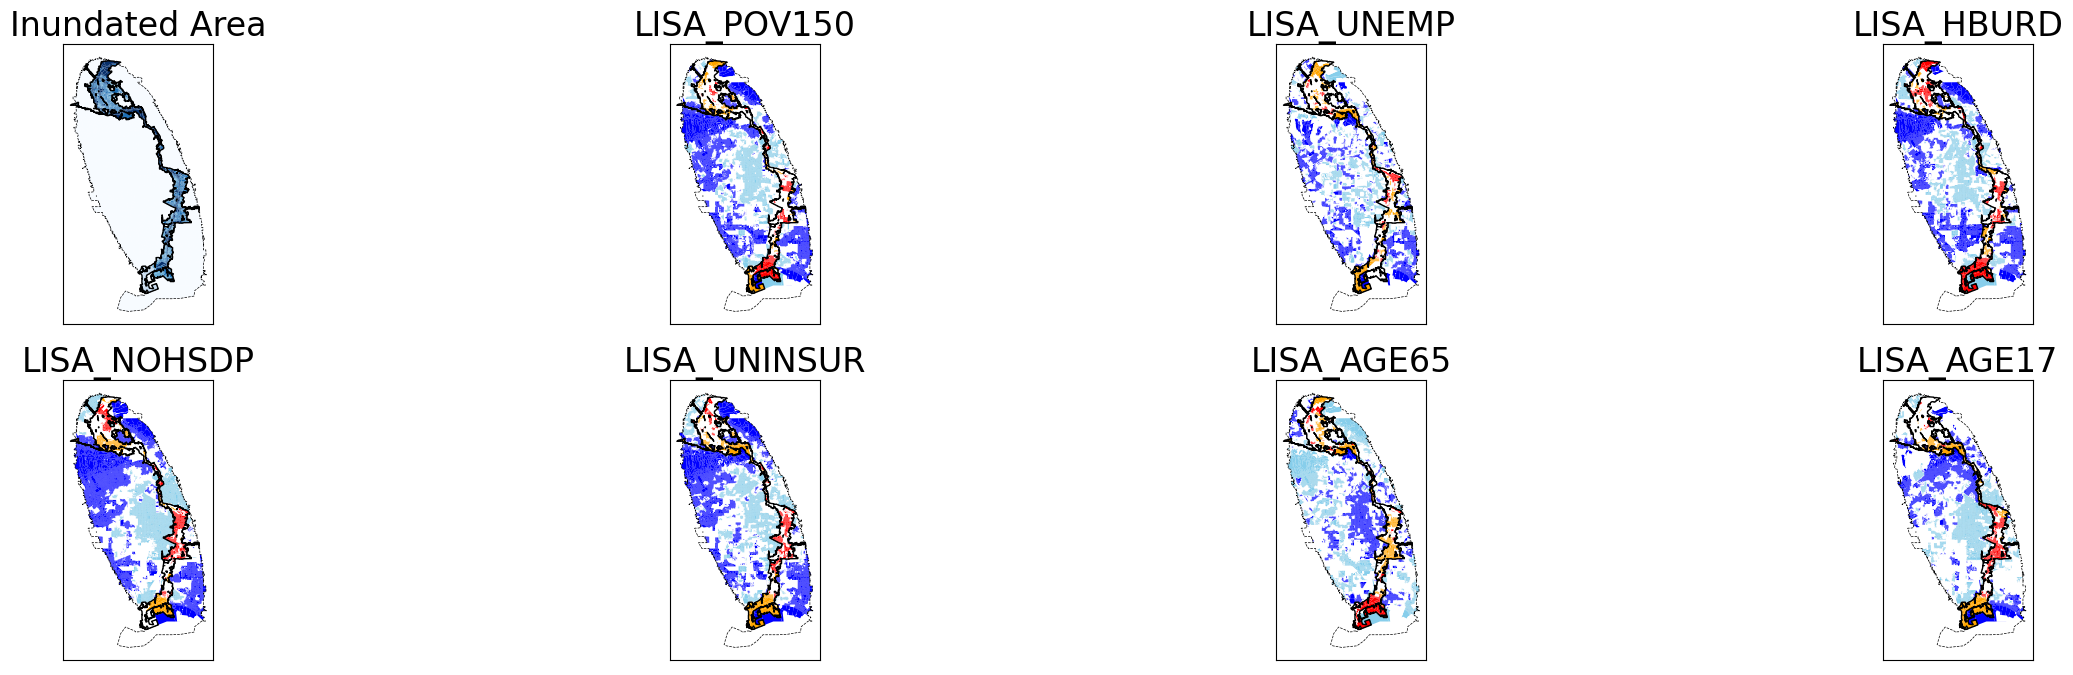

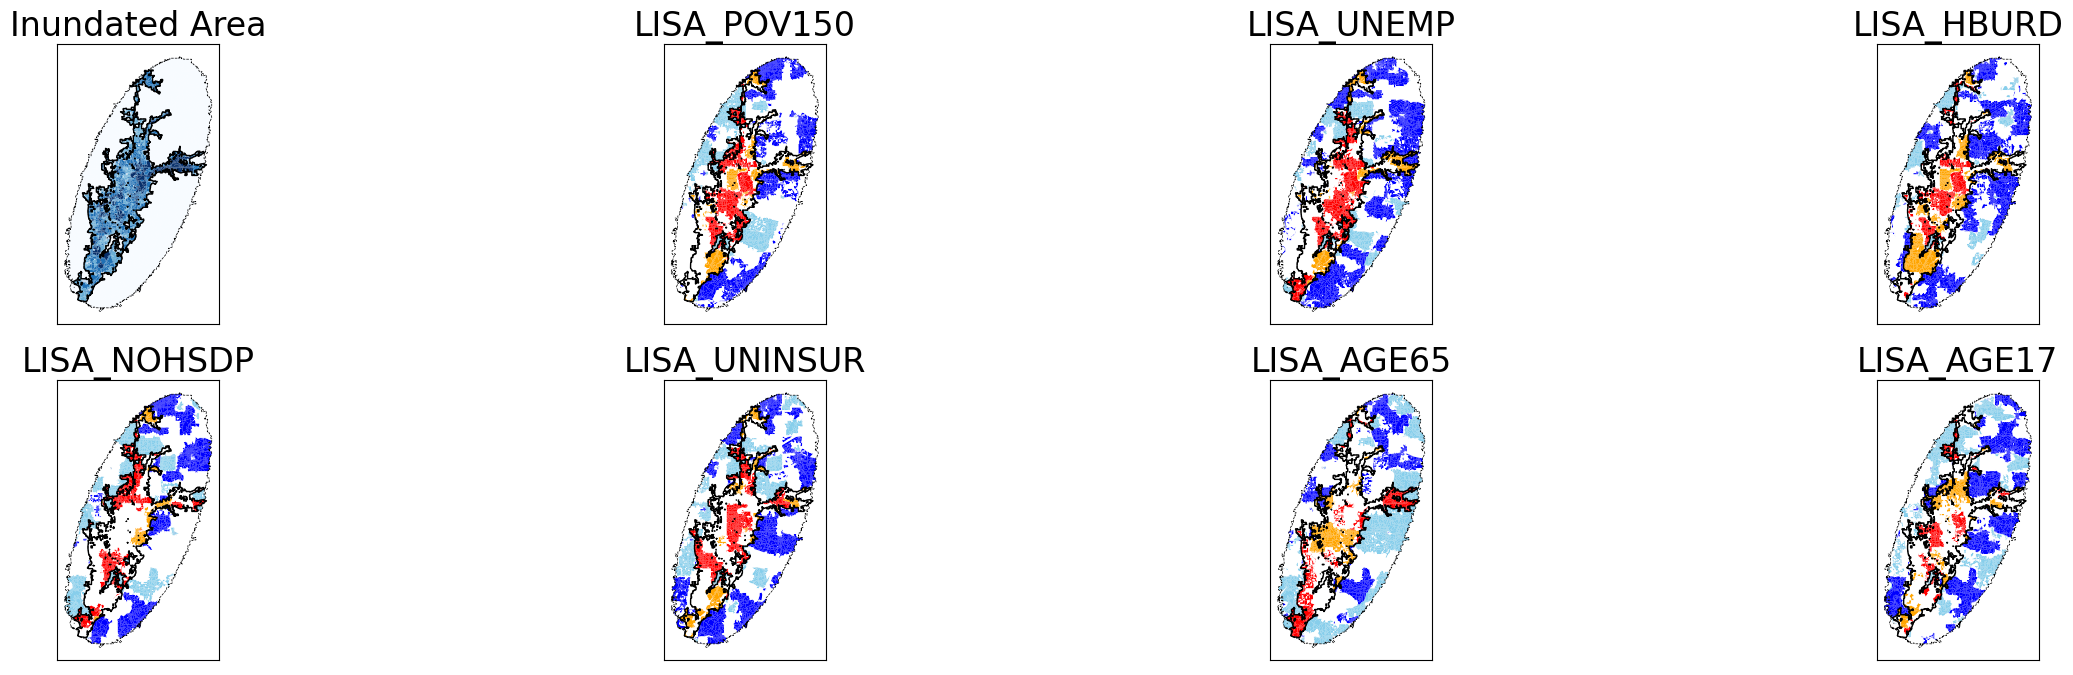

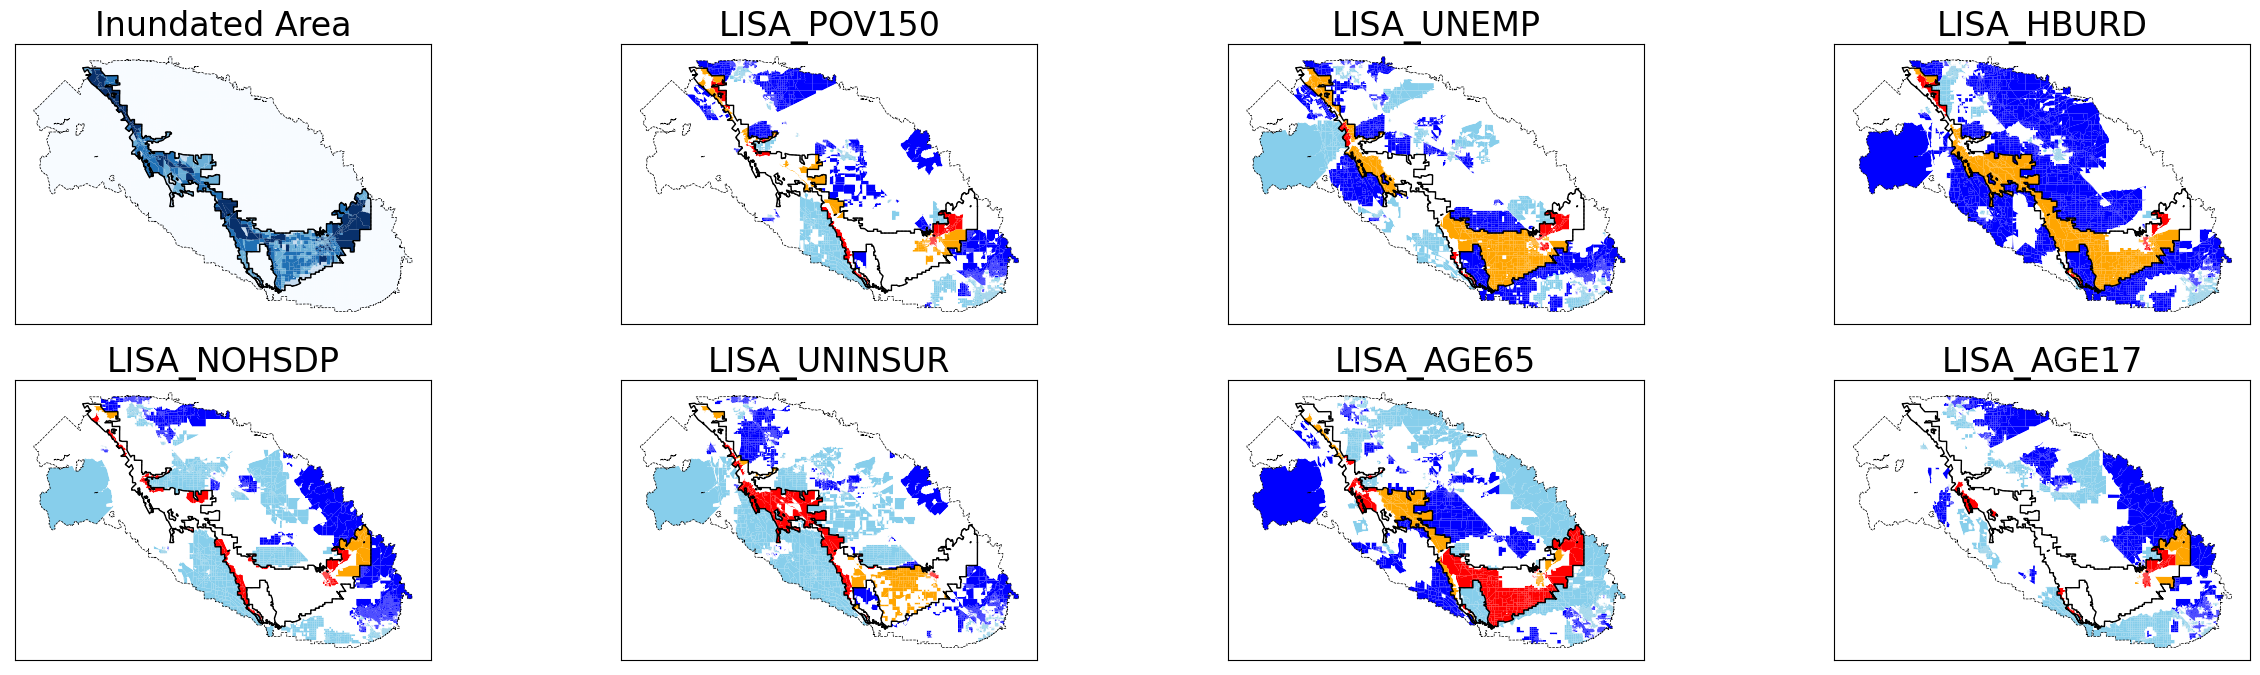

In [8]:
def plot_bivariate_moran_i_and_local_moran_i(dam_id, fim_geoid_gdf):
    fig, axes = plt.subplots(2, 4, figsize=(30, 8))
    ax = axes.reshape(-1)

    # Define geography related to each dam
    dam_area = fim_geoid_gdf.loc[fim_geoid_gdf['Dam_ID'] == dam_id].reset_index()

    benchmark_area = dam_area.loc[dam_area['Class'] == 0]
    inund_area = dam_area.loc[dam_area['Class'] > 0]
    benchmark_area_union = benchmark_area.dissolve(by='Dam_ID')
    inund_area_union = inund_area.dissolve(by='Dam_ID')

    dams_focus = mi.loc[mi['ID'] == dam_id].reset_index()
    dams_focus = dams_focus.to_crs(epsg=5070)

    # Plot maps
#     var_list = ['no_hs_dip', 'poverty', 'unprof_eng', 'mobile_home', 'no_vehicle', 'unemployed', 'age65']
    for m in range(8):
        if m == 0:
            fim_geoid_gdf[fim_geoid_gdf['Dam_ID'] == dam_id].plot('Class', cmap='Blues', ax=ax[m])
            ax[m].set_title(label="Inundated Area", fontsize=24)
        else:
            
            lisa_color = {'HH': 'red', 'LL': 'blue', 'HL': 'orange', 'LH': 'skyblue', 'Not_Sig': 'white'}
            
            for key in lisa_color.keys():
                fim_geoid_gdf.loc[(fim_geoid_gdf[f'{plot_cols[m-1]}'] == key) & (fim_geoid_gdf['Dam_ID'] == dam_id)].plot(ax=ax[m], color=lisa_color[key], legend=True)
            
            ax[m].set_title(label=f"{plot_cols[m-1]}", fontsize=24)

        benchmark_area_union.boundary.plot(ax=ax[m], color='black', lw=0.5, linestyle='dashed')
        inund_area_union.boundary.plot(ax=ax[m], color='black', lw=1)
        ax[m].get_xaxis().set_visible(False)
        ax[m].get_yaxis().set_visible(False)
        
    plt.show()
    
for dam_id in mi['ID'].unique():

    plot_bivariate_moran_i_and_local_moran_i(dam_id, lm)